In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sources
# http://рос-мир.рф/node/2460 - состав
# https://rosstat.gov.ru/bgd/regl/b12_11/IssWWW.exe/Stg/d1/02-08.htm - число религ объединений

In [98]:
s = '''Orthodox, 41
Other, 25
Atheists, 13
Muslims, 4.7
Christians, 4.1
Sunni Muslims, 1.7
Orthodox outside the Church, 1.5
Pagans, 1.2
Buddhists, 0.5
Old Believers, 0.5
Protestants, 0.5
Shiite Muslims, 0.5
Catholics, 0.5
Judaists, 0.5
Hindus, 0.5
Pentecostals, 0.5'''

s = s.split('\n')
for i in range(len(s)):
    s[i] = s[i].split(', ')

population = pd.DataFrame(s, columns=['affiliation', 'followers'])


In [99]:
orgs = pd.read_excel('religious_orgs.xlsx')
orgs
# 24624-orgs.nums.sum() = 2141

,affiliation,nums
0,Orthodox,13943
1,Old Believers,303
2,Catholics,230
3,Muslims,4317
4,Buddhists,221
5,Judaists,276
6,Christians,1918
7,Pentecostals,1270
8,Hindus,1
9,Pagans,4


In [100]:
population

,affiliation,followers
0,Orthodox,41
1,Other,25
2,Atheists,13
3,Muslims,4.7
4,Christians,4.1
5,Sunni Muslims,1.7
6,Orthodox outside the Church,1.5
7,Pagans,1.2
8,Buddhists,0.5
9,Old Believers,0.5


In [101]:
df = orgs.merge(population, on='affiliation')
df.sort_values(by=['followers'], inplace=True)
df.nums = df.nums * 100 / df.nums.sum()
df

,affiliation,nums,followers
1,Old Believers,1.230507,0.5
2,Catholics,0.934048,0.5
4,Buddhists,0.897498,0.5
5,Judaists,1.120858,0.5
7,Pentecostals,5.157570,0.5
8,Hindus,0.004061,0.5
9,Pagans,0.016244,1.2
10,Other,8.694769,25
6,Christians,7.789149,4.1
3,Muslims,17.531676,4.7


In [102]:
from math import log2, log10, sqrt

df.followers = pd.to_numeric(df.followers)

df.nums = df.nums.apply(sqrt)
df.followers = df.followers.apply(sqrt)
df

,affiliation,nums,followers
1,Old Believers,1.109282,0.707107
2,Catholics,0.966462,0.707107
4,Buddhists,0.947364,0.707107
5,Judaists,1.058706,0.707107
7,Pentecostals,2.271028,0.707107
8,Hindus,0.063727,0.707107
9,Pagans,0.127453,1.095445
10,Other,2.948689,5.000000
6,Christians,2.790905,2.024846
3,Muslims,4.187084,2.167948


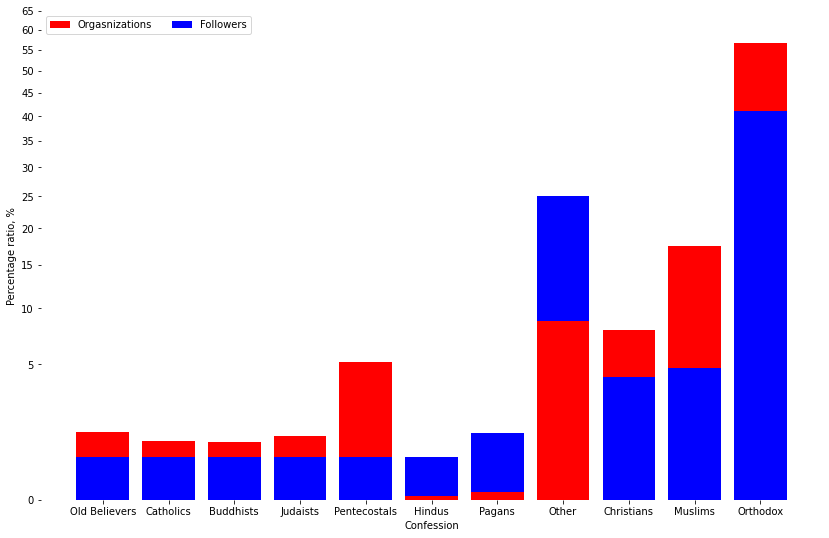

In [105]:
df.followers = pd.to_numeric(df.followers)

f, ax = plt.subplots(figsize = (14,9))


plt.bar(df.affiliation.iloc[0], df.nums.iloc[0], color='r',label = 'Orgasnizations')
plt.bar(df.affiliation.iloc[0], df.followers.iloc[0], color='b',label = 'Followers')
for i in range(1, len(df)):
    if df.nums.iloc[i] > df.followers.iloc[i]:
        plt.bar(df.affiliation.iloc[i], df.nums.iloc[i], color='r')
        plt.bar(df.affiliation.iloc[i], df.followers.iloc[i], color='b')
    else:
        plt.bar(df.affiliation.iloc[i], df.followers.iloc[i], color='b')
        plt.bar(df.affiliation.iloc[i], df.nums.iloc[i], color='r')

ax.legend(ncol = 2, loc = 'upper left')

ax.set_xlabel('Confession')
ax.set_ylabel('Percentage ratio, %')

plt.yticks([sqrt(i) for i in range(0, 70, 5)], [str(i) for i in range(0, 70, 5)])

sns.despine(left = True, bottom = True)

In [104]:
# f.savefig('/Users/danil/Documents/Study/chart.png')